In [19]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

## Loading the iris dataset

In [20]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

In [21]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

## Let's do a Regular PCA

In [22]:
from sklearn import decomposition

pca = decomposition.PCA()
pca_transformed = pca.fit_transform(X_scaled)

### Looking at the list of PCs

In [23]:
pca.components_

array([[ 0.42494212, -0.15074824,  0.61626702,  0.64568888],
       [ 0.42320271,  0.90396711, -0.06038308, -0.00983925],
       [-0.71357236,  0.33631602, -0.0659003 ,  0.61103451],
       [-0.36213001,  0.21681781,  0.78244872, -0.45784921]])

### Check how much variance is explained by each principal component

In [24]:
print(pca.explained_variance_ratio_)

[0.84136038 0.11751808 0.03473561 0.00638592]


### Plot the first 2 PCs on a 2-D space

Text(0.5, 1.0, 'PCA of IRIS dataset')

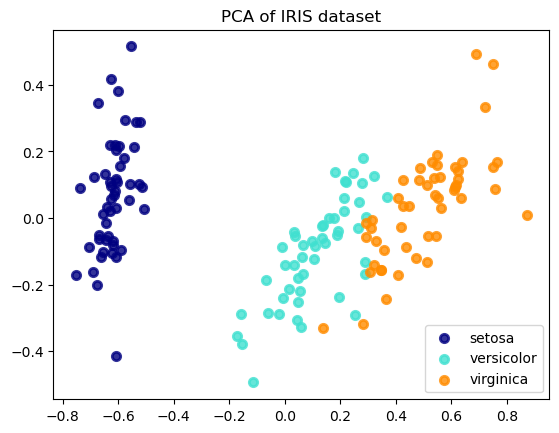

In [25]:
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        pca_transformed[y == i, 0], pca_transformed[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

## Now let's look at how will autoencoder handle the same dataset
This part requires you to have pytorch installed on your machine. PyTorch is one of two most recognized deep learning libaries. We will be using PyTorch to construct the autoencoder.

Depending on your machine's operation system and CUDA capabilities, there are processes and dependency to install PyTorch. You can follow the official guide from PyTorch [here](https://pytorch.org/get-started/locally/) to set it up on your local machine.

Optionally, if you don't want to deal with the hussel of setting it up on your local machine, you can use some online platforms to run this notebook, i.e. [Google Colab](https://colab.google/). It should have all the packages ready to run this notebook.

In [27]:
import torch
from torchvision import transforms

In [28]:
tensor_transform = transforms.ToTensor()
loader = torch.utils.data.DataLoader(dataset = X_scaled, batch_size=32, shuffle=True)

In [29]:
#Define autoencoder model
class Autoencoder(torch.nn.Module):
    def __init__(self, input_size, encoding_dim) -> None:
        super(Autoencoder, self).__init__()

        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(input_size, 8),
            torch.nn.ReLU(),
            torch.nn.Linear(8, encoding_dim),
            torch.nn.ReLU()
        )

        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(encoding_dim, 8),
            torch.nn.ReLU(),
            torch.nn.Linear(8, input_size),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)

        return x

In [30]:
input_dim = X_scaled.shape[1]
encoding_dim = 2

torch.manual_seed(42)

ae_model = Autoencoder(input_dim, encoding_dim)

# Loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(ae_model.parameters(), lr=0.003)

# convert to pytorch tensor
X_tensor = torch.FloatTensor(X_scaled)
print(input_dim)

4


In [31]:
# Training the autoencoder
num_epochs = 1000
for epoch in range(num_epochs):
   # Forward pass
   outputs = ae_model(X_tensor)
   loss = criterion(outputs, X_tensor)

   # Backward pass and optimization
   optimizer.zero_grad()
   loss.backward()
   optimizer.step()

   # Loss for each epoch
   # print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

In [32]:
# Encoding the data using the trained autoencoder
encoded_data = ae_model.encoder(X_tensor).detach().numpy()
# print(encoded_data)

### Plot the encoded data

Text(0.5, 1.0, 'Linear AE of IRIS dataset')

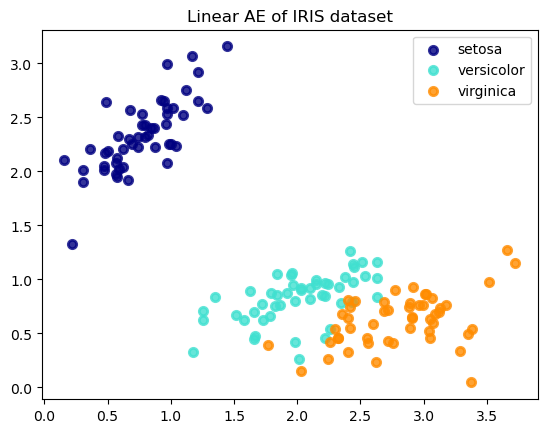

In [33]:
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        encoded_data[y == i, 0], encoded_data[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("Linear AE of IRIS dataset")